<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/Homework_%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%86%D0%B8%D0%B8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные концепции Machine Learning. Домашняя работа

In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

# импортируем модуль, отвечающий за деревья решений
from sklearn.tree import DecisionTreeClassifier, export_text

# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [2]:
### Здесь требуется загрузить датасет phones.csv ###
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
phones = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_01/1.8_phones.csv")

In [4]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


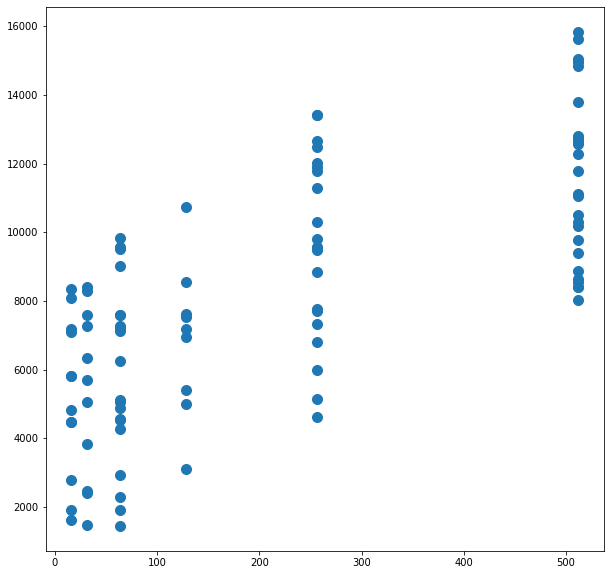

In [5]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(phones.disk, phones.price, s=100)
plt.show()

Задание 1: обучить модель регрессии

In [6]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk']]
y = phones.price

In [7]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
# создаем регрессор
reg = LinearRegression().fit(X, y)

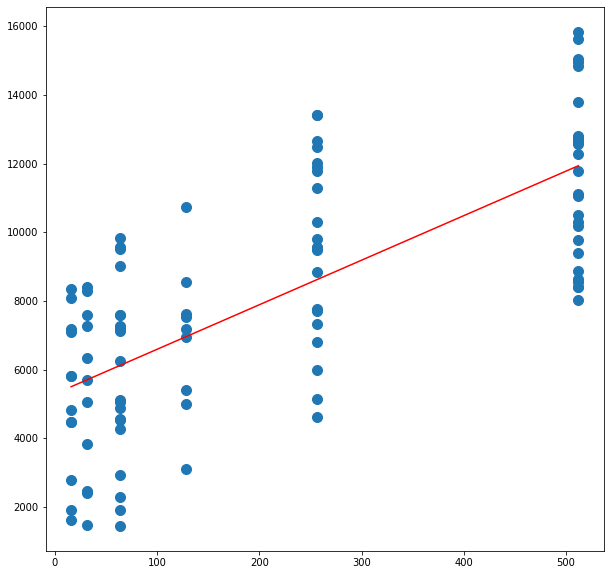

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(phones.disk, phones.price, s=100)
ax.plot([X.min(), X.max()], [reg.predict(X).min(), reg.predict(X).max()], c="red")

plt.show()

Задание 2: обучить модель классификации

In [9]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price']]
y = phones['os']

cl = DecisionTreeClassifier().fit(X, y)

In [10]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [11]:
# проведем классификацию
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

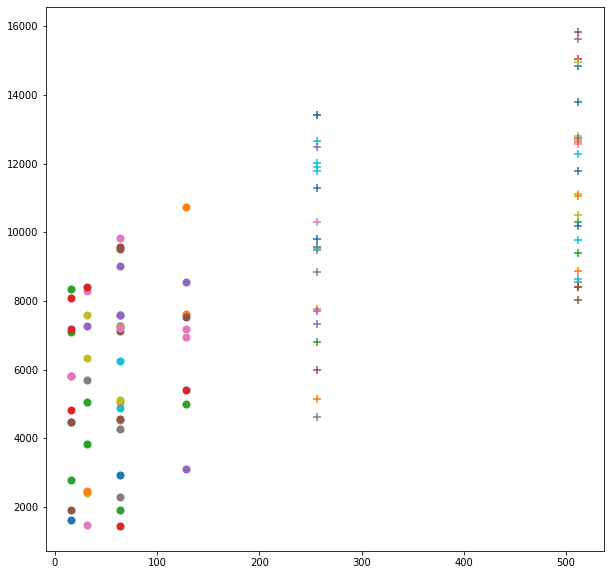

In [12]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "+"}
for disk, price, os in zip(phones.disk, phones.price, phones.os):
    plt.scatter(disk, price, s=50, marker=markers[os])

# отображаем картинку
plt.show()

In [13]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price']]

In [16]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

# создаем модель для кластеризации
clust = KMeans(n_clusters=2).fit(X)
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_
clust.cluster_centers_

array([[  116.8       ,  5784.78333333],
       [  368.        , 11601.65      ]])

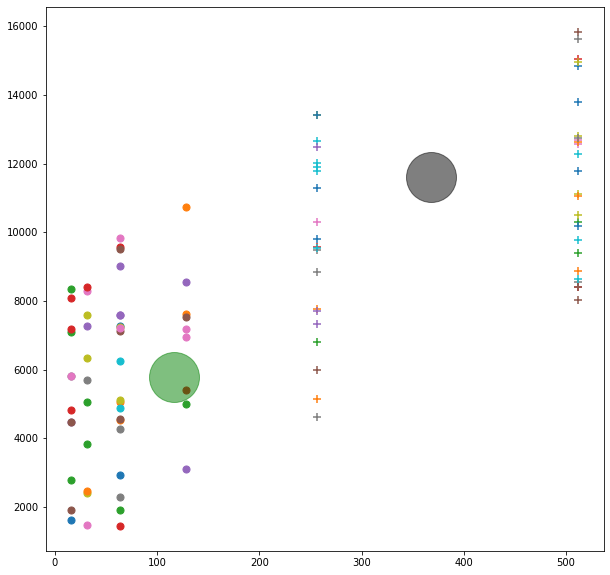

In [32]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "+"}
for disk, price, os in zip(phones.disk, phones.price, phones.os):
    plt.scatter(disk, price, s=50, marker=markers[os])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=2500, marker="o", c="green", alpha=0.5)
# plt.scatter(c1[0], c1[1], s=500 * 4e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=2500, marker="o", c="black", alpha=0.5)
# plt.scatter(c2[0], c2[1], s=4000*60, c="black", alpha=0.1)

# отображаем картинку
plt.show()